# Assignment 2 - Hactiv8 Introduction to Python for Data Science


Nama            :   Jasmine Nur Ramadhani

Kelas           :   PYTN-KS20

Kode Peserta    :   PYTN-KS20-016


## Data for Project

Sumber data : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

## Project Overview
This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
- BOROUGH : A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you're able to make decisions using data in a scientific manner

# Import Library

In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# About the Data

## Read Dataset

In [2]:
# Memanggil dataset yang digunakan
df = pd.read_csv("dataset/nyc-rolling-sales.csv")

## Data Info

In [3]:
# untuk mendapatkan panjang nilai di kolom dataframe
len(df)

84548

In [4]:
# Mengetahui jumlah baris dan kolom 
df.shape     # (baris, kolom)

(84548, 22)

In [5]:
# Untuk mengetahui dimensi 
df.ndim

2

In [6]:
# Menampilkan 5 baris teratas dengan .head()
pd.set_option("display.max.columns", None)     # Displaying maximum column
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
# Menampilkan 5 baris terbawah dengan .tail()
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [8]:
# Mengembalikan label setiap kolom dari dataframe
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

## Displaying Data Type

Menampilkan informasi detail mengenai dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

# Data Preprocessing

In [10]:
# Drop kolom 'Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'
c_drop = ['Unnamed: 0', 'EASE-MENT','APARTMENT NUMBER']
df.drop(c_drop, axis=1, inplace=True) 

In [11]:
# Menampilkan 2 baris teratas
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   ZIP CODE                        84548 non-null  int64 
 9   RESIDENTIAL UNITS               84548 non-null  int64 
 10  COMMERCIAL UNITS                84548 non-null  int64 
 11  TOTAL UNITS                     84548 non-null  int64 
 12  LAND SQUARE FEET                84548 non-null

In [13]:
# Memeriksa kolom yang bertipe kategorik
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


Di atas merupakan feature dengan tipe kategorik. Selanjutnya, akan diubah tipe data 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH' menjadi tipe numerik dan 'SALE DATE' menjadi dalam format datetime.

In [14]:
# Convert column to numerical type
numerical = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']
for col in numerical: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert column to categorical type
categorical = ['BOROUGH','NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df[col] = df[col].astype('category')

# Convert 'SALE DATE' to datetime format
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

## Check for any missing values
Melakukan pengecekan apakah terdapat missing atau null values pada data

In [15]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Dapat diketahui bahwa terdapat sekitar 31% LAND SQUARE FEET, 32% GROSS SQUARE FEET, dan 17% SALE PRICE missing value pada feature tersebut.

In [16]:
# Mengetahui jumlah nilai null pada feature 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'
df[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].isnull().sum()

LAND SQUARE FEET     26252
GROSS SQUARE FEET    27612
SALE PRICE           14561
dtype: int64

In [17]:
# Mengisi missing values pada feature terkait dengan rata-rata pada kolom tersebut
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)

In [18]:
# Memeriksa kembali jumlah nilai null yang tersisa pada feature 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'
df[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].isnull().sum()

LAND SQUARE FEET         0
GROSS SQUARE FEET        0
SALE PRICE           14561
dtype: int64

In [19]:
# Memeriksa jumlah missing value
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
# Memeriksa kembali jumlah missing value
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Missing value sudah tidak ada.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69987 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         69987 non-null  category      
 1   NEIGHBORHOOD                    69987 non-null  category      
 2   BUILDING CLASS CATEGORY         69987 non-null  category      
 3   TAX CLASS AT PRESENT            69987 non-null  category      
 4   BLOCK                           69987 non-null  int64         
 5   LOT                             69987 non-null  int64         
 6   BUILDING CLASS AT PRESENT       69987 non-null  category      
 7   ADDRESS                         69987 non-null  object        
 8   ZIP CODE                        69987 non-null  int64         
 9   RESIDENTIAL UNITS               69987 non-null  int64         
 10  COMMERCIAL UNITS                69987 non-null  int64         
 11  TOTAL U

In [23]:
df['BOROUGH'] = df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


## Check for outlier

In [24]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,6.998700e+04,6.998700e+04,69987.000000,6.998700e+04,69987
mean,4196.072528,373.828397,10741.455185,1.899553,0.172489,2.092203,3.723936e+03,3.788460e+03,1799.348236,1.276456e+06,2017-02-27 21:22:54.478117376
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016-09-01 00:00:00
25%,1348.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.900000e+03,1.268000e+03,1920.000000,2.250000e+05,2016-11-30 00:00:00
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.946000e+03,2.400000e+03,1937.000000,5.300000e+05,2017-02-28 00:00:00
75%,6186.000000,709.000000,11249.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,9.500000e+05,2017-05-31 00:00:00
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09,2017-08-31 00:00:00
std,3429.196524,656.096528,1263.234938,14.549545,9.123717,17.276100,3.369980e+04,2.447372e+04,520.884552,1.140526e+07,NaN


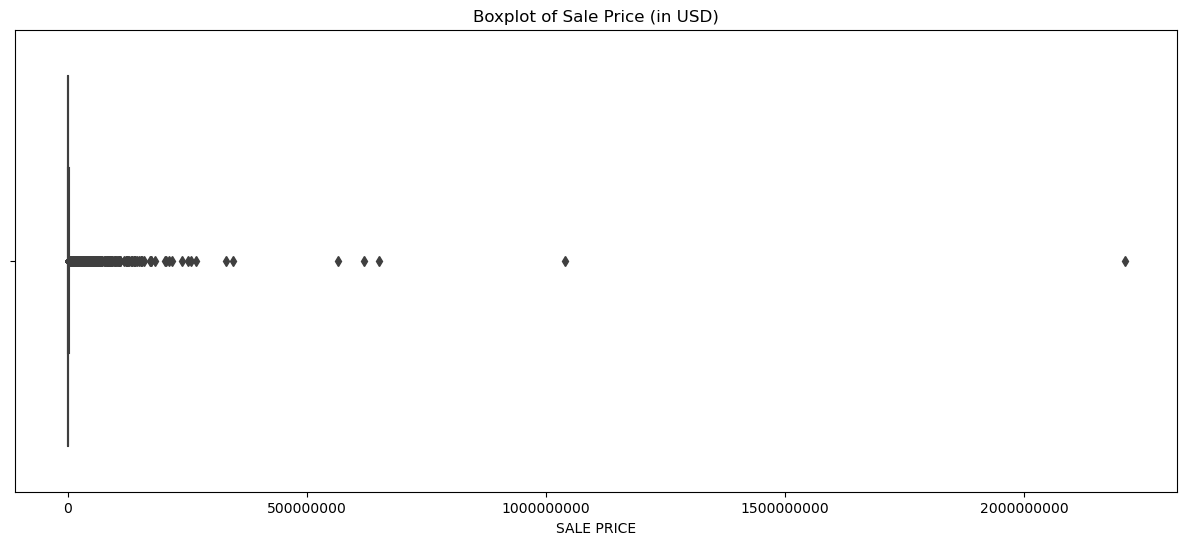

In [25]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Sale Price (in USD)')
plt.show()

<Axes: xlabel='SALE PRICE', ylabel='Density'>

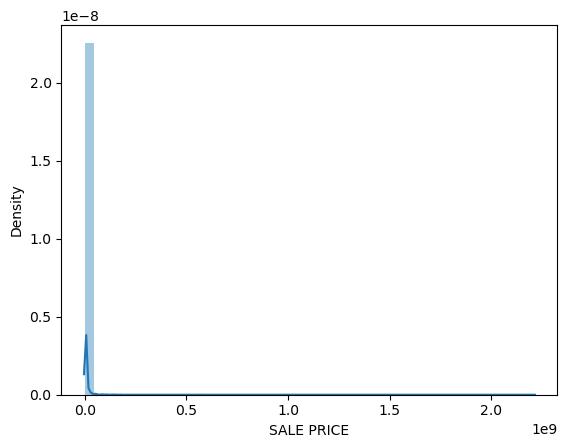

In [26]:
sns.distplot(df['SALE PRICE'])

In [27]:
# Memilih nilai 'SALE PRICE' yang berada antara 100000-500000
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

<Axes: xlabel='SALE PRICE', ylabel='Density'>

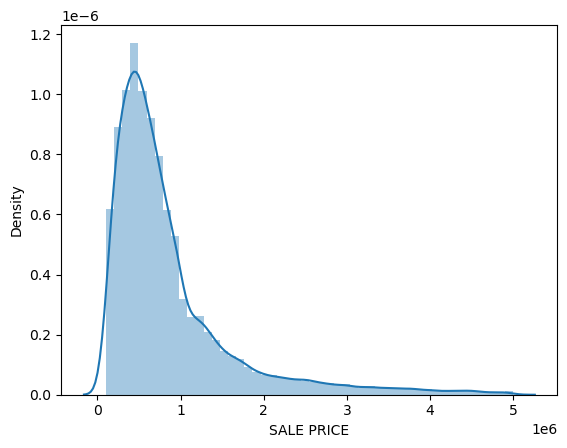

In [28]:
sns.distplot(df['SALE PRICE'])

0.1989281802313763


<Axes: xlabel='SALE PRICE', ylabel='Density'>

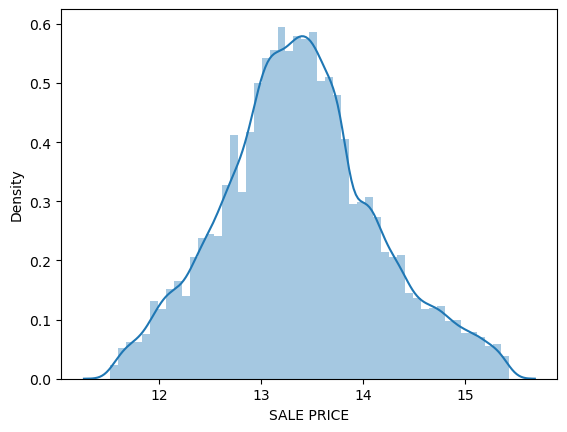

In [29]:
sales=np.log(df['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

In [30]:
# Mengambil data yang jika Commercial Units dan Residential Units dijumlahkan sama dengan Total Units
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

In [31]:
# Mengambil kolom 'TOTAL UNITS' dan 'SALE PRICE' dan mengurutkannya berdasarkan 'SALE PRICE' secara menaik
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=True)

,TOTAL UNITS,SALE PRICE
34,35,1
36,38,1
37,39,1
38,47,1
40,51,1
...,...,...
4,4,709
3,3,2735
2,2,9592
0,0,15561


In [32]:
# Mengambil nilai dari 'TOTAL UNITS' yang lebih dari 0
df = df[df['TOTAL UNITS'] > 0]

In [33]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.000000,6794.000000,1913,2,C4,3936272.0,2016-09-23
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.000000,4226.000000,1920,2,C4,3192840.0,2016-09-23
76,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,10009,1,0,1,3941.675775,4045.707479,0,2,R2,620000.0,2016-12-30
79,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,10009,1,0,1,3941.675775,4045.707479,1920,2,R4,762669.0,2016-09-21
80,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,10009,1,0,1,3941.675775,4045.707479,1920,2,R4,772851.0,2016-09-12


# Measure of Central Tendency 

## Mean

In [34]:
# Menghitung rata-rata 'LAND SQUARE FEET' secara keseluruhan
landsf_mean = statistics.mean(df['LAND SQUARE FEET'])
print("Mean of Land Square Feet : ", landsf_mean)

# Menghitung rata-rata 'GROSS SQUARE FEET' secara keseluruhan
gross_mean = statistics.mean(df['GROSS SQUARE FEET'])
print("Mean of Gross Square Feet : ", gross_mean)

# Menghitung rata-rata 'SALE PRICE' secara keseluruhan
saleprice_mean = statistics.mean(df['SALE PRICE'])
print("Mean of Sale Price : ", saleprice_mean)


Mean of Land Square Feet :  3370.146242768047
Mean of Gross Square Feet :  2711.1721499191576
Mean of Sale Price :  930665.9979840273


In [35]:
# Mengetahui mean dari luas dan harga properti di masing-masing wilayah 'BOROUGH'
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Manhattan,3877.978581,4610.617808,1.773910e+06
Bronx,2791.264755,2675.371208,5.705575e+05
Brooklyn,2068.386497,1951.887100,1.089856e+06
Queens,3803.129361,2747.895411,7.137109e+05
Staten Islands,5015.262363,2414.942403,5.139370e+05


## Median

In [36]:
# Menghitung median 'LAND SQUARE FEET' secara keseluruhan
landsf_median = statistics.mean(df['LAND SQUARE FEET'])
print("Mean of Land Square Feet : ", landsf_median)

# Menghitung median 'GROSS SQUARE FEET' secara keseluruhan
gross_median = statistics.mean(df['GROSS SQUARE FEET'])
print("Mean of Gross Square Feet : ", gross_median)

# Menghitung median 'SALE PRICE' secara keseluruhan
saleprice_median = statistics.mean(df['SALE PRICE'])
print("Mean of Sale Price : ", saleprice_median)

Mean of Land Square Feet :  3370.146242768047
Mean of Gross Square Feet :  2711.1721499191576
Mean of Sale Price :  930665.9979840273


In [37]:
# Mengetahui median dari luas dan harga properti di masing-masing wilayah 'BOROUGH'
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Manhattan,3941.675775,4045.707479,1450000.0
Bronx,2498.000000,2000.000000,460000.0
Brooklyn,1875.000000,1620.000000,870000.0
Queens,3120.000000,1800.000000,635000.0
Staten Islands,3800.000000,1660.000000,475000.0


## Modus

In [38]:
borough_mode      = statistics.mode(df['BOROUGH'])
neighborhood_mode = statistics.mode(df['NEIGHBORHOOD'])
bca_mode          = statistics.mode(df['BUILDING CLASS CATEGORY'])

print("Mode Borough                         :" , borough_mode)
print("Mode Neighborhood                    :" , neighborhood_mode)
print("Mode Building Class Category         :" , bca_mode)

Mode Borough                         : Queens
Mode Neighborhood                    : FLUSHING-NORTH
Mode Building Class Category         : 01 ONE FAMILY DWELLINGS                    


# Measure of Spread

## Range

In [39]:
# Menghitung range 'LAND SQUARE FEET' 
landsf_range = np.ptp(df['LAND SQUARE FEET'])
print("Range of Land Square Feet : ",landsf_range)

# Menghitung range 'GROSS SQUARE FEET'
gross_range = np.ptp(df['GROSS SQUARE FEET'])
print("Range of Gross Square Feet : ",gross_range)

# Menghitung range 'SALE PRICE'
saleprice_range = np.ptp(df['SALE PRICE'])
print("Range of Sale Price : ",saleprice_range)

Range of Land Square Feet :  4228300.0
Range of Gross Square Feet :  3750565.0
Range of Sale Price :  4896141.0


## Variance

Selanjutnya menghitung varians dari 'LAND SQUARE FEET', 'GROSS SQUARE FEET', dan 'SALE PRICE'

In [40]:
landsf_var = statistics.variance(df['LAND SQUARE FEET'])
print("Variance of Land Square Feet : ",landsf_var)

gross_var = statistics.variance(df['GROSS SQUARE FEET'])
print("Variance of Gross Square Feet : ",gross_var)

saleprice_var = statistics.variance(df['SALE PRICE'])
print("Variance of Sale Price : ",saleprice_var)

Variance of Land Square Feet :  784943943.6782851
Variance of Gross Square Feet :  447639868.1077128
Variance of Sale Price :  610113463281.7974


In [41]:
# Menghitung variance tiap 'BOROUGH'
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Manhattan,9.462408e+05,1.568667e+08,1.215216e+12
Bronx,1.139375e+07,5.580859e+07,3.175923e+11
Brooklyn,3.500257e+08,5.544497e+07,6.064715e+11
Queens,1.428745e+09,1.149806e+09,1.931377e+11
Staten Islands,1.486833e+09,1.977009e+08,7.395934e+10


## Standard Deviation

Selanjutnya menghitung standar deviasi dari 'LAND SQUARE FEET', 'GROSS SQUARE FEET', dan 'SALE PRICE'

In [42]:
# Menghitung standard deviasi secara keseluruhan

landsf_std = statistics.stdev(df['LAND SQUARE FEET'])
print("Standard Deviation of Land Square Feet : ",landsf_std)

gross_std = statistics.stdev(df['GROSS SQUARE FEET'])
print("Standard Deviation of Gross Square Feet : ",gross_std)

saleprice_std = statistics.stdev(df['SALE PRICE'])
print("Standard Deviation of Sale Price : ",saleprice_std)

Standard Deviation of Land Square Feet :  28016.85106642581
Standard Deviation of Gross Square Feet :  21157.501461838845
Standard Deviation of Sale Price :  781097.6016361831


In [43]:
# Menghitung standard deviasi tiap 'BOROUGH'
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Manhattan,972.749100,12524.643200,1.102369e+06
Bronx,3375.463465,7470.514466,5.635533e+05
Brooklyn,18708.974009,7446.137838,7.787628e+05
Queens,37798.746378,33908.784372,4.394743e+05
Staten Islands,38559.474415,14060.613551,2.719547e+05


# Probability Distribution

Distribusi harga jual di wilayah Brooklyn

[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'Probability'),
 Text(0.5, 1.0, 'Distribusi Harga Jual di wilayah Brooklyn')]

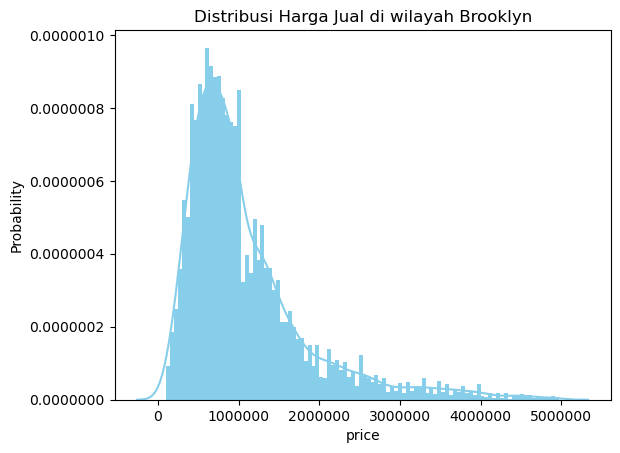

In [44]:
dist_brooklyn= df[df['BOROUGH'] == 'Brooklyn']['SALE PRICE']

ax = sns.distplot(dist_brooklyn,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.ticklabel_format(style='plain')
ax.set(xlabel='price', ylabel='Probability', title='Distribusi Harga Jual di wilayah Brooklyn')

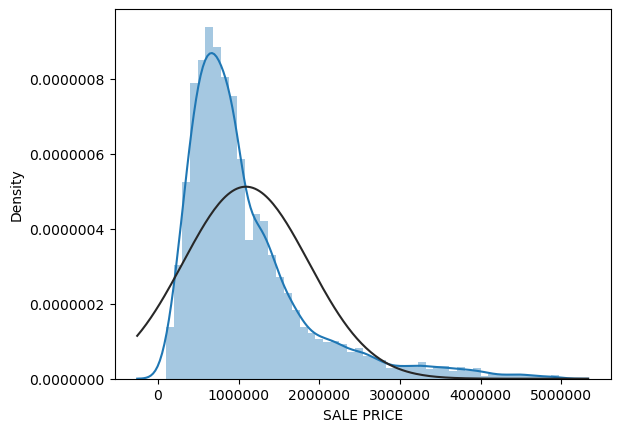

In [45]:
from scipy.stats import norm
x = pd.Series(dist_brooklyn.values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)
ax.ticklabel_format(style='plain')

# Convidenve Interval

Construct CI for the mean of sale price in Brooklyn

In [46]:
df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                     
                        mean           std   size
BOROUGH                                          
Manhattan       1.773910e+06  1.102369e+06   5323
Bronx           5.705575e+05  5.635533e+05   3626
Brooklyn        1.089856e+06  7.787628e+05  11612
Queens          7.137109e+05  4.394743e+05  12634
Staten Islands  5.139370e+05  2.719547e+05   5496

In [47]:
brooklyn_mean = 1.089856e+06 # rata-rata harga properti di Brooklyn
brooklyn_std = 7.787628e+05  # standar deviasi harga properti di Brooklyn

n = 11612       # jumlah properti di Brooklyn
z_sc = 1.96     # z-score berdasarkan tabel z
se = brooklyn_std / np.sqrt(n) # menghitung standart eror

# Construct the CI
lower_limit = brooklyn_mean - z_sc*se
upper_limit = brooklyn_mean + z_sc*se

print("The lower limit of the CI is", lower_limit)
print("The upper limit of the CI is", upper_limit)

The lower limit of the CI is 1075691.2877739056
The upper limit of the CI is 1104020.7122260944


Maka dapat diketahui bahwa true mean untuk harga jual pada wilayah Brooklyn akan berada diantara 1075691.2877739056 dan 1104020.7122260944

# Hypothesis Testing

## Is there a difference in unit sold between property built in 1975-1999 and 2000 so on?

Population: Total Units in NYC Property Sales data

Parameter of Interest:
- μ1 − μ2
- Year Built

Significance Level :
alpha = 5% = 0.05

Hypothesis :
- H0 (Null Hypothesis) : μ1 = μ2 (tidak terdapat perbedaan unit terjual antara property yang dibangun tahun 1975-1999 dan tahun 2000 ke atas)
- H1 (Alternative Hypthosis) : μ1 ≠ μ2 (terdapat perbedaan unit terjual antara property yang dibangun tahun 1975-1999 dan tahun 2000 ke atas)

Syarat penolakan H0 :
- H0 ditolak jika nilai p-value < alpha = 0.05

In [48]:
# Menggunakan kolom 'RESIDENTAL UNITS' dan 'YEAR BUILD'
resi_year = df[['RESIDENTIAL UNITS','YEAR BUILT']]
resi_year.head()

,RESIDENTIAL UNITS,YEAR BUILT
3,10,1913
6,8,1920
76,1,0
79,1,1920
80,1,1920


In [49]:
# Untuk residental unit yang dibangun pada tahun 1975-1999
resi_year["YEAR BUILT"] = df["YEAR BUILT"].astype("int")
df_pvalue1 = resi_year[
    (resi_year['YEAR BUILT'] > 1975) &
    (resi_year['YEAR BUILT'] < 2000)]
df_pvalue1.head()

,RESIDENTIAL UNITS,YEAR BUILT
611,1,1987
612,1,1987
613,1,1987
617,1,1984
640,1,1983


In [50]:
# Untuk residental unit yang dibangun pada tahun 2000 ke atas
df_pvalue2 = resi_year[(resi_year['YEAR BUILT'] >= 2000)]
df_pvalue2.head()

,RESIDENTIAL UNITS,YEAR BUILT
95,1,2014
100,1,2014
104,1,2014
112,1,2014
116,1,2005


In [51]:
n1 = len(df_pvalue1)
mu1 = df_pvalue1["RESIDENTIAL UNITS"].mean()
sd1 = df_pvalue1["RESIDENTIAL UNITS"].std()
n2 = len(df_pvalue2)
mu2 = df_pvalue2["RESIDENTIAL UNITS"].mean()
sd2 = df_pvalue2["RESIDENTIAL UNITS"].std()

In [52]:
(n1, mu1, sd1)

(3539, 1.2175755863238202, 0.7267144206751768)

In [53]:
(n2, mu2, sd2)

(7488, 1.2757745726495726, 1.2082219946421002)

In [54]:
sm.stats.ztest(df_pvalue1["RESIDENTIAL UNITS"], df_pvalue2["RESIDENTIAL UNITS"], alternative='two-sided')

(-2.6480629747407827, 0.008095444336157658)

Keputusan :

- H0 ditolak karena nilai p-value = 0.008095444336157658 < alpha = 0.05

Kesimpulan :

- Pada significance level 5%, karena nilai p-value = 0.008095444336157658 < alpha = 0.5 maka H0 ditolak, di mana berarti terdapat perbedaan residental unit yang terjual pada tahun 1975 - 1999 dan tahun 2000 ke atas 

# Kesimpulan

- Wilayah Manhattan memiliki rata-rata 'SALE PRICE' tertinggi dibanding wilayah lain, yaitu sebesar 1.773910e+06.
- Dalam kategori Borough, Neighborhood, dan kelas bangunan yang paling sering muncul secara berurutan adalah Queens, FLUSHING-NORTH, dan 01 ONE FAMILY DWELLINGS 
- Berdasarkan uji hipotesis, didapatkan p-value < 0.05 sehingga H0 ditolah dan terdapat perbedaan residental unit yang terjual pada tahun 1975 - 1999 dan tahun 2000 ke atas 